C:\Users\shaha\AppData\Local\Temp\ipykernel_21940\3391216622.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("tab10", len(np.unique(game_map)))


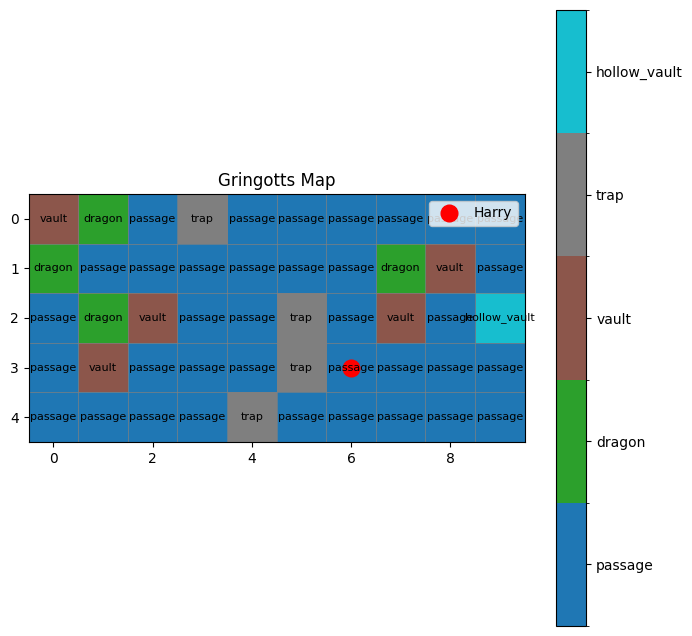

In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Define the CODES_NEW dictionary
CODES_NEW = {'passage': 0, 'dragon': 1, 'vault': 2, 'trap': 3, 
             'hollow_vault': 4, 'vault_trap': 5, 'dragon_trap': 6, 
             'hollow_trap_vault': 7}

# Reverse the dictionary for labeling
INVERSE_CODES_NEW = {v: k for k, v in CODES_NEW.items()}

def visualize_map(game_map, harry_loc=None, title="Gringotts Map"):
    """
    Visualize the Gringotts map as a grid.
    
    Parameters:
    - game_map: 2D list where integers represent different elements.
    - harry_loc: Tuple (row, col) for Harry's location. Default is None.
    - title: Title for the map. Default is "Gringotts Map".
    """
    # Create a colormap for the grid
    cmap = plt.cm.get_cmap("tab10", len(np.unique(game_map)))
    bounds = np.arange(-0.5, len(np.unique(game_map)) + 0.5, 1)
    norm = mcolors.BoundaryNorm(bounds, cmap.N)
    
    fig, ax = plt.subplots(figsize=(8, 8))
    im = ax.imshow(game_map, cmap=cmap, norm=norm)

    # Add colorbar with custom labels
    cbar = fig.colorbar(im, ax=ax, ticks=np.unique(game_map))
    cbar.ax.set_yticklabels([INVERSE_CODES_NEW.get(int(code), f"Code {code}") for code in np.unique(game_map)])
    
    # Show gridlines
    ax.set_xticks(np.arange(-0.5, len(game_map[0]), 1), minor=True)
    ax.set_yticks(np.arange(-0.5, len(game_map), 1), minor=True)
    ax.grid(which="minor", color="gray", linestyle="-", linewidth=0.5)
    ax.tick_params(which="minor", bottom=False, left=False)
    
    # Annotate grid cells with labels
    for i in range(len(game_map)):
        for j in range(len(game_map[0])):
            label = INVERSE_CODES_NEW.get(game_map[i][j], "")
            ax.text(j, i, label, ha='center', va='center', color="black", fontsize=8)
    
    # Highlight Harry's location
    if harry_loc:
        ax.plot(harry_loc[1], harry_loc[0], 'o', color='red', markersize=12, label="Harry")
        ax.legend(loc="upper right")
    
    ax.set_title(title)
    plt.show()

# Example usage
game_map = [
           [ 2, 1, 0, 3, 0, 0, 0, 0, 0, 0 ], [ 1, 0, 0, 0, 0, 0, 0, 1, 2, 0 ], [ 0, 1, 2, 0, 0, 3, 0, 2, 0, 4 ],
            [ 0, 2, 0, 0, 0, 3, 0, 0, 0, 0 ], [ 0, 0, 0, 0, 3, 0, 0, 0, 0, 0 ]]

harry_loc = (3, 6) # Harry's starting location

visualize_map(game_map, harry_loc)


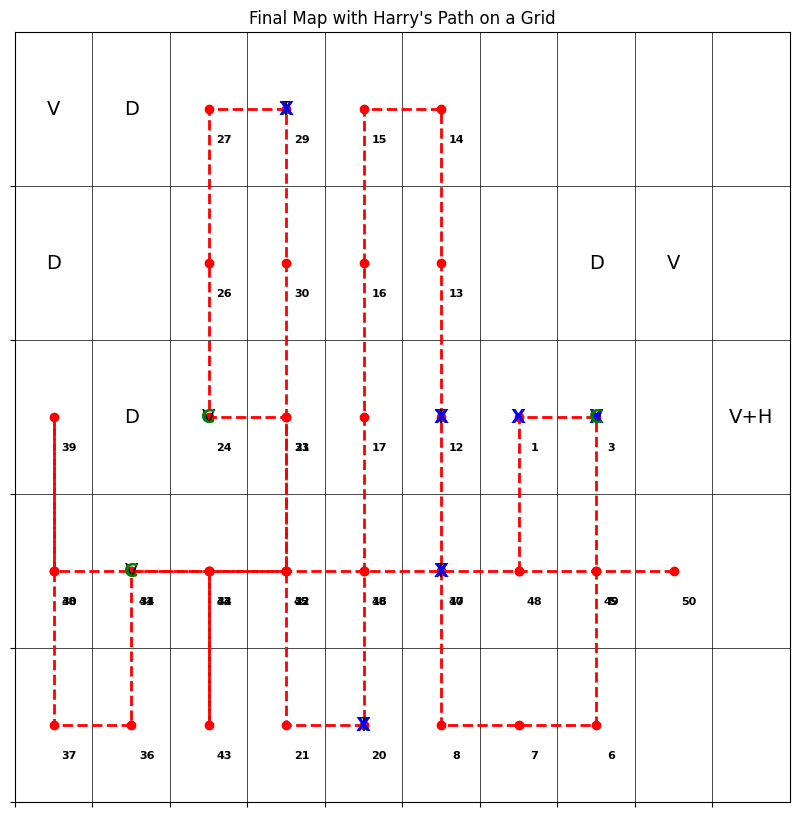

In [6]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import matplotlib.font_manager as fm

def plot_final_path_with_grid(harry_start, full_map, actions):
    """
    Plot a single map with Harry's path using a grid representation where each (i, j) is a tile.
    """
    # Define Unicode symbols for map objects
    UNICODE_SYMBOLS = {
        0: "",  # Passage
        1: "D",  # Dragon
        2: "V",  # Vault
        3: "T",  # Trap
        4: "V+H",  # Hollow Vault
        5: "V+T",  # Vault & Trap
        6: "D+T",  # Dragon & Trap
        7: "V+H+T",  # Hollow Trap Vault
    }

    fig, ax = plt.subplots(figsize=(10, 10))
    rows, cols = len(full_map), len(full_map[0])

    # Draw grid
    for i in range(rows + 1):
        ax.axhline(i, color="black", linewidth=0.5)
    for j in range(cols + 1):
        ax.axvline(j, color="black", linewidth=0.5)

    # Set up the map
    for y in range(rows):
        for x in range(cols):
            ax.text(
                x + 0.5,
                rows - y - 0.5,
                UNICODE_SYMBOLS.get(full_map[y][x], "?"),
                ha="center",
                va="center",
                fontsize=14,
            )

    # Draw Harry's path
    current_position = harry_start
    path_x = [current_position[1] + 0.5]
    path_y = [rows - current_position[0] - 0.5]

    for step, action in enumerate(actions):
        action_type = action[0]
        if action_type == "move":
            new_position = action[1]
            path_x.append(new_position[1] + 0.5)
            path_y.append(rows - new_position[0] - 0.5)
            ax.text(
                new_position[1] + 0.7,
                rows - new_position[0] - 0.7,
                str(step),
                color="black",
                fontsize=8,
                ha="center",
                va="center",
                fontweight="bold",
            )
            current_position = new_position
        elif action_type == "destroy":
            target_position = action[1]
            ax.text(
                target_position[1] + 0.5,
                rows - target_position[0] - 0.5,
                "X",
                color="blue",
                fontsize=14,
                ha="center",
                va="center",
                fontweight="bold",
            )
        elif action_type == "collect":
            ax.text(
                current_position[1] + 0.5,
                rows - current_position[0] - 0.5,
                "C",
                color="green",
                fontsize=14,
                ha="center",
                va="center",
                fontweight="bold",
            )

    # Draw the path
    ax.plot(path_x, path_y, color="red", linewidth=2, linestyle="--", marker="o")

    # Set limits and labels
    ax.set_xlim(0, cols)
    ax.set_ylim(0, rows)
    ax.set_xticks(range(cols))
    ax.set_yticks(range(rows))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.title("Final Map with Harry's Path on a Grid")
    plt.show()

full_map =  [
           [ 2, 1, 0, 3, 0, 0, 0, 0, 0, 0 ], [ 1, 0, 0, 0, 0, 0, 0, 1, 2, 0 ], [ 0, 1, 2, 0, 0, 3, 0, 2, 0, 4 ],
            [ 0, 2, 0, 0, 0, 3, 0, 0, 0, 0 ], [ 0, 0, 0, 0, 3, 0, 0, 0, 0, 0 ]]
harry_start = (3, 6) # Harry's starting location

actions = [
   ('destroy', (2, 6)), ('move', (2, 6)), ('destroy', (2, 7)), ('move', (2, 7)),
    ('collect',), ('move', (3, 7)), ('move', (4, 7)), ('move', (4, 6)),
    ('move', (4, 5)), ('destroy', (3, 5)), ('move', (3, 5)), ('destroy', (2, 5)),
    ('move', (2, 5)), ('move', (1, 5)), ('move', (0, 5)), ('move', (0, 4)),
    ('move', (1, 4)), ('move', (2, 4)), ('move', (3, 4)), ('destroy', (4, 4)),
    ('move', (4, 4)), ('move', (4, 3)), ('move', (3, 3)), ('move', (2, 3)),
    ('move', (2, 2)), ('collect',), ('move', (1, 2)), ('move', (0, 2)),
    ('destroy', (0, 3)), ('move', (0, 3)), ('move', (1, 3)), ('move', (2, 3)),
    ('move', (3, 3)), ('move', (3, 2)), ('move', (3, 1)), ('collect',),
    ('move', (4, 1)), ('move', (4, 0)), ('move', (3, 0)), ('move', (2, 0)),
    ('move', (3, 0)), ('move', (3, 1)), ('move', (3, 2)), ('move', (4, 2)),
    ('move', (3, 2)), ('move', (3, 3)), ('move', (3, 4)), ('move', (3, 5)),
    ('move', (3, 6)), ('move', (3, 7)), ('move', (3, 8))
]

plot_final_path_with_grid(harry_start, full_map, actions)
